In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from sklearn.metrics import mean_squared_log_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn import cross_validation
from datetime import timedelta
from sklearn import metrics
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.grid_search import GridSearchCV
import re
import math
from sklearn.preprocessing import Imputer
import os
import seaborn as sb
from sklearn.utils import shuffle
import lightgbm as lgb
import holidays
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
train_data=pd.read_csv(r'E:\hackathons\train.csv')
history_meals=pd.read_csv(r'E:\hackathons\meal_info.csv')
history_center=pd.read_csv(r'E:\hackathons\fulfilment_center_info.csv')

In [6]:
history_meals.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [7]:
train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
history_center.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [9]:
train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


## meals analysis

In [11]:
history_meals.shape[0]

51

In [12]:
history_meals.meal_id.nunique()

51

In [13]:
history_meals.category.value_counts()

Beverages       12
Desert           3
Soup             3
Starters         3
Other Snacks     3
Seafood          3
Biryani          3
Pizza            3
Salad            3
Fish             3
Sandwich         3
Pasta            3
Extras           3
Rice Bowl        3
Name: category, dtype: int64

In [14]:
history_meals.cuisine.value_counts()

Thai           15
Continental    12
Italian        12
Indian         12
Name: cuisine, dtype: int64

In [15]:
history_meals.groupby(['cuisine','category'],as_index=False).meal_id.count()

,cuisine,category,meal_id
0,Continental,Beverages,3
1,Continental,Fish,3
2,Continental,Pizza,3
3,Continental,Seafood,3
4,Indian,Beverages,3
5,Indian,Biryani,3
6,Indian,Desert,3
7,Indian,Rice Bowl,3
8,Italian,Beverages,3
9,Italian,Pasta,3


## center analysis

In [16]:
history_center.shape[0]

77

In [17]:
history_center.center_id.nunique()

77

In [18]:
def get_unique(df):
    for x in df.columns.tolist():
        print(x," : ",str(df[x].nunique()))

In [19]:
get_unique(history_center)

center_id  :  77
city_code  :  51
region_code  :  8
center_type  :  3
op_area  :  30


In [20]:
history_center.groupby(['center_type'],as_index=False).center_id.count()

,center_type,center_id
0,TYPE_A,43
1,TYPE_B,15
2,TYPE_C,19


In [21]:
history_center.groupby(['center_type']).region_code.nunique()

center_type
TYPE_A    8
TYPE_B    4
TYPE_C    4
Name: region_code, dtype: int64

In [22]:
history_center.groupby(['center_type','region_code']).center_id.count()

center_type  region_code
TYPE_A       23              1
             34             10
             35              1
             56             17
             71              1
             77             10
             85              2
             93              1
TYPE_B       34              5
             56              6
             77              3
             85              1
TYPE_C       34              6
             56              7
             77              4
             85              2
Name: center_id, dtype: int64

In [23]:
# 4 region code are specific to TYPE_A
23-1
35-1
71-1
93-1
# rest 4 codes(34,56,77,85) - are all three types

92

In [24]:
history_center.groupby(['center_type']).op_area.mean()/3.157895 #type b covers most area and c least

center_type
TYPE_A    1.290969
TYPE_B    1.511555
TYPE_C    1.000000
Name: op_area, dtype: float64

In [25]:
history_center.groupby(['region_code']).op_area.mean().sort_values()/2.8

region_code
35    1.000000
23    1.214286
85    1.278571
34    1.363946
77    1.394958
93    1.464286
56    1.519048
71    1.607143
Name: op_area, dtype: float64

In [26]:
history_center.groupby(['center_type','region_code']).op_area.mean()

center_type  region_code
TYPE_A       23             3.400000
             34             3.990000
             35             2.800000
             56             4.276471
             71             4.500000
             77             4.040000
             85             3.750000
             93             4.100000
TYPE_B       34             4.240000
             56             5.733333
             77             4.133333
             85             3.600000
TYPE_C       34             3.183333
             56             2.928571
             77             3.400000
             85             3.400000
Name: op_area, dtype: float64

In [27]:
a1=history_center.groupby(['center_type','region_code'],as_index=False).op_area.mean()
a2=history_center.groupby(['center_type'],as_index=False).op_area.mean()
a3=pd.merge(a1,a2,how='left',on='center_type')

In [28]:
a3['ratio']=a3['op_area_x']/a3['op_area_y']

In [29]:
a3

,center_type,region_code,op_area_x,op_area_y,ratio
0,TYPE_A,23,3.400000,4.076744,0.833999
1,TYPE_A,34,3.990000,4.076744,0.978722
2,TYPE_A,35,2.800000,4.076744,0.686823
3,TYPE_A,56,4.276471,4.076744,1.048992
4,TYPE_A,71,4.500000,4.076744,1.103822
5,TYPE_A,77,4.040000,4.076744,0.990987
6,TYPE_A,85,3.750000,4.076744,0.919852
7,TYPE_A,93,4.100000,4.076744,1.005705
8,TYPE_B,34,4.240000,4.773333,0.888268
9,TYPE_B,56,5.733333,4.773333,1.201117


## trends with train data

In [30]:
train_data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [31]:
history_center.dtypes

center_id        int64
city_code        int64
region_code      int64
center_type     object
op_area        float64
dtype: object

In [32]:
history_meals.dtypes

meal_id      int64
category    object
cuisine     object
dtype: object

In [33]:
mj1=pd.merge(train_data,history_meals,how='left',on='meal_id')

In [34]:
total_train=pd.merge(mj1,history_center,how='left',on='center_id')

In [35]:
total_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [65]:
total_train.to_csv('overall_train.csv')

In [36]:
train_data.shape[0]

456548

In [37]:
get_unique(train_data)

id  :  456548
week  :  145
center_id  :  77
meal_id  :  51
checkout_price  :  1992
base_price  :  1907
emailer_for_promotion  :  2
homepage_featured  :  2
num_orders  :  1250


In [38]:
test_data=pd.read_csv(r'E:\hackathons\test_QoiMO9B.csv')

In [39]:
test_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [40]:
test_data.shape

(32573, 8)

In [41]:
get_unique(test_data)

id  :  32573
week  :  10
center_id  :  77
meal_id  :  51
checkout_price  :  1397
base_price  :  1179
emailer_for_promotion  :  2
homepage_featured  :  2


In [42]:
total_train.groupby(['emailer_for_promotion'],as_index=False).num_orders.mean()

,emailer_for_promotion,num_orders
0,0,229.262883
1,1,631.097544


In [43]:
total_train.groupby(['homepage_featured'],as_index=False).num_orders.mean()

,homepage_featured,num_orders
0,0,221.050040
1,1,594.884786


In [44]:
total_train.groupby(['emailer_for_promotion','homepage_featured'],as_index=False).num_orders.mean()

,emailer_for_promotion,homepage_featured,num_orders
0,0,0,211.416983
1,0,1,455.876208
2,1,0,431.277625
3,1,1,816.246061


In [45]:
total_train['tax_plus_delivery_minus_discount']=total_train['checkout_price']-total_train['base_price']

In [46]:
total_train[['checkout_price','base_price','tax_plus_delivery_minus_discount']].describe()

,checkout_price,base_price,tax_plus_delivery_minus_discount
count,456548.000000,456548.000000,456548.000000
mean,332.238933,354.156627,-21.917695
std,152.939723,160.715914,48.495857
min,2.970000,55.350000,-561.600000
25%,228.950000,243.500000,-16.520000
50%,296.820000,310.460000,-1.000000
75%,445.230000,458.870000,1.000000
max,866.270000,866.270000,185.300000


In [47]:
total_train['actual_discount']=total_train['base_price']-total_train['checkout_price']

In [48]:
total_train['actual_discount'].describe()

count    456548.000000
mean         21.917695
std          48.495857
min        -185.300000
25%          -1.000000
50%           1.000000
75%          16.520000
max         561.600000
Name: actual_discount, dtype: float64

In [ ]:
# general discount is b/w -30 rs loss to 70 rs

## dividing in train, validation and test set

In [49]:
train_data.shape[0]#(week 1 to 145) 145 week

456548

In [50]:
test_data.shape[0]#(week 146-155)10 week

32573

In [ ]:
# train - 125 weeks
# validation - 126-138 - 13 weeks
# test - 139 - 145 - 7 weeks

In [50]:
final_train=train_data[train_data['week']<=125]

In [51]:
final_train.shape[0]

390907

In [52]:
validation_set=train_data[(train_data['week']>125)&(train_data['week']<139)]

In [53]:
validation_set.shape[0]

42654

In [54]:
validation_set.week.nunique()

13

In [55]:
test_set=train_data[train_data['week']>=139]

In [56]:
test_set.shape[0]

22987

In [57]:
test_set.week.nunique()

7

In [ ]:
## after dividing train,test,validation set
"""
Now 
    train -125 weeks(final_train)
    validation - 13 weeks(validation_set)
    test - 7 weeks(test_set)
    acutal_test - 10 weeks(train_data)
    history_meal,history_center - historical datasets(completely used everywhere)
"""

## baseline

In [58]:
## base score
final_train.num_orders.mean()

264.65237255920204

In [59]:
predsss=np.full((22987,),final_train.num_orders.mean())

In [60]:
test_set['num_orders'].shape

(22987,)

In [61]:
mean_squared_log_error(predsss,test_set['num_orders'])

1.8766457662137499

In [ ]:
# checking - 
# Internal
# train = final_train
# test = Validation_set


# to check your score
# train = final_train+validation
#test = test_set

#for submission
# train = final_train+validation_set+test_set
#test = test_data

In [ ]:
# initialize

In [365]:
train = train_data
#train=train_data[train_data['week']<136]
test= test_data
#test=train_data[train_data['week']>=136]

In [366]:
train.shape

(456548, 11)

In [367]:
test.shape

(32573, 10)

## feature creation

In [368]:
from sklearn.ensemble import RandomForestRegressor

In [369]:
# direct features
train['actual_discount']=train['base_price']-train['checkout_price']
test['actual_discount']=test['base_price']-test['checkout_price']

In [370]:
from sklearn.cross_validation import KFold
# for regression rather then target do stratified for class label

In [371]:
def get_history(x):
    return (x.mean())

def get_group_column(z,top):
    return z.apply(lambda x: x if (x in top) else 'others')

def preprocessing(train,test,columns,noise_threshold):
    for col in columns:
        train[col]=train[col].astype(str)
        all_values = train[col].value_counts()
        top_values=all_values[all_values>=noise_threshold].index.tolist()
        train[col+'_grouped']=get_group_column(train[col],top_values)
        if len(test)!=0:
            test[col]=test[col].astype(str)
            test[col+'_grouped']=get_group_column(test[col],top_values)
    return train,test
def target_encoding(train,test,columns,target):
    for col in columns:
        history_table=train.groupby([col+'_grouped'],as_index=False).agg({target:get_history})
        if len(test)!=0:
            test[col+'_history']=test[col+'_grouped'].map(history_table.set_index(col+'_grouped')[target])
        y_train = train[col+'_grouped'].values
        skf = StratifiedKFold(y_train,7,shuffle=True,random_state=123)
        for tr_ind,val_ind in skf:
            X_tr,X_val = train.iloc[tr_ind],train.iloc[val_ind]
            means = X_val[col+'_grouped'].map(X_tr.groupby(col+'_grouped')[target].mean())
            X_val['_mean_target_'] = means
            train.loc[val_ind,col+'_history']  =X_val['_mean_target_']
    return train,test

In [372]:
def target_encoding2(train,test,columns,target):
    for col1,col2 in columns:
        history_table=train.groupby([col1+'_grouped',col2+'_grouped'],as_index=False).agg({target:get_history})
        history_table.columns=[col1+'_grouped',col2+'_grouped',col1+'_'+col2+'_history']
        if len(test)!=0:
            test=pd.merge(test,history_table,how='left',on=[col1+'_grouped',col2+'_grouped'])
        y_train = train[col1+'_grouped'].values
        skf = StratifiedKFold(y_train,5,shuffle=True,random_state=123)
        for tr_ind,val_ind in skf:
            X_tr,X_val = train.iloc[tr_ind],train.iloc[val_ind]
            history_table_temp=X_tr.groupby([col1+'_grouped',col2+'_grouped'],as_index=False).agg({target:get_history})
            history_table_temp.columns=[col1+'_grouped',col2+'_grouped',col1+'_'+col2+'_history']
            means=pd.merge(X_val[[col1+'_grouped',col2+'_grouped']],history_table_temp,how='left',on=[col1+'_grouped',col2+'_grouped'])[col1+'_'+col2+'_history'].values
            X_val['_mean_target_'] = means
            train.loc[val_ind,col1+'_'+col2+'_history']  =X_val['_mean_target_']
    return train,test

In [373]:
def target_encoding3(train,test,columns,target):
    for col1,col2,col3 in columns:
        train['index_of_3']=train[col1+'_grouped']+'|'+train[col2+'_grouped']+'|'+train[col3+'_grouped']
        history_table=train.groupby([col1+'_grouped',col2+'_grouped',col3+'_grouped'],as_index=False).agg({target:get_history})
        history_table.columns=[col1+'_grouped',col2+'_grouped',col3+'_grouped',col1+'_'+col2+'_'+col3+'_history']
        if len(test)!=0:
            test=pd.merge(test,history_table,how='left',on=[col1+'_grouped',col2+'_grouped',col3+'_grouped'])
        y_train = train['index_of_3'].values
        skf = StratifiedKFold(y_train,4,shuffle=True,random_state=123)
        for tr_ind,val_ind in skf:
            X_tr,X_val = train.iloc[tr_ind],train.iloc[val_ind]
            history_table_temp=X_tr.groupby([col1+'_grouped',col2+'_grouped',col3+'_grouped'],as_index=False).agg({target:get_history})
            history_table_temp.columns=[col1+'_grouped',col2+'_grouped',col3+'_grouped',col1+'_'+col2+'_'+col3+'_history']
            means = pd.merge(X_val[[col1+'_grouped',col2+'_grouped',col3+'_grouped']],history_table_temp,how='left',on=[col1+'_grouped',col2+'_grouped',col3+'_grouped'])[col1+'_'+col2+'_'+col3+'_history']
            X_val['_mean_target_'] = means
            train.loc[val_ind,col1+'_'+col2+'_'+col3+'_history']  =X_val['_mean_target_']
    return train,test

In [374]:
def two_level_target_encoding(train,test,level1,level2,target,unique_id,noise_threshold,get_rank):
    multi_level=train.groupby([level1,level2]).agg({target:'sum',unique_id:'count'}).sort_values(unique_id,ascending=False)
    multi_level.reset_index(inplace=True)
    multi_level.groupby([level1,level2]).agg({target:'first',unique_id:'first'})
    multi_level.reset_index(inplace=True)
    group_count=train.groupby([level1]).agg({unique_id:'count'})
    group_count.reset_index(inplace=True)
    group_count.columns=[level1,'total_count']
    final_level=pd.merge(multi_level,group_count,how='left',on=level1)
    x=final_level.groupby([level1])
    u = list(x.groups.keys())
    final=pd.DataFrame()
    for i in u:
        df=x.get_group(i)
        df['cumsum'] = df[unique_id].cumsum()
        df['total_count'] = (0.90*df['total_count'])-df[unique_id]
        df['label']=df[level2].astype(str)
        #if (df.ix[df['total_count'] < 0, :].shape[0])> 0:
        #    df.ix[df['total_count']<0,:]=df.ix[df['total_count']<0,:].set_value(df.loc[df['total_count']<0,'total_count'].index[0],'total_count',0.1)
        df.ix[df[unique_id]<noise_threshold,:]=df.ix[df[unique_id]<noise_threshold,:].set_value(df.loc[df[unique_id]<noise_threshold,unique_id].index,'total_count',-0.1)
        df['history']=df[target]/df[unique_id]
        df.loc[df['total_count']<0,'label']='others'
        if len(df.loc[df['total_count']<0,'history'])!=0:
            df.loc[df['total_count']<0,'history']=((df[df['total_count']<0][target].sum())/(df[df['total_count']<0][unique_id].sum()))
        df.sort_values('history',ascending=False,inplace=True)
        if get_rank:
            df['rank']=df['history'].rank(ascending=False,method='dense')
        else:
            df['rank']=df['history']
        df=df[[level1,level2,'label','rank']]
        final=pd.concat([final,df])
    if get_rank:
        final.columns=[level1,level2,level1+'_'+level2+'_label',level1+'_'+level2+'_rank']
    else:
        final.columns=[level1,level2,level1+'_'+level2+'_label',level1+'_'+level2+'_history']
    final[level1]=final[level1].astype(str)
    final[level2]=final[level2].astype(str)
    train[level1]=train[level1].astype(str)
    train[level2]=train[level2].astype(str)
    train=pd.merge(train,final,how='left',on=[level1,level2])
    test[level1]=test[level1].astype(str)
    test[level2]=test[level2].astype(str)
    test=pd.merge(test,final,how='left',on=[level1,level2])
    if get_rank:
        del train[level1+'_'+level2+'_rank']
        del test[level1+'_'+level2+'_rank']
    else:
        del train[level1+'_'+level2+'_history']
        del test[level1+'_'+level2+'_history']
    test.loc[test[level1+'_'+level2+'_label'].isnull(),level1+'_'+level2+'_label']='others'
    train.loc[train[level1+'_'+level2+'_label'].isnull(),level1+'_'+level2+'_label']='others'
    train=pd.merge(train,final.drop_duplicates([level1,level1+'_'+level2+'_label']),on=[level1,level1+'_'+level2+'_label'],how='left')
    test=pd.merge(test,final.drop_duplicates([level1,level1+'_'+level2+'_label']),on=[level1,level1+'_'+level2+'_label'],how='left')
    train.rename(columns={level2+'_x':level2},inplace=True)
    test.rename(columns={level2+'_x':level2},inplace=True)
    return train,test

In [315]:
'''def feature_creation_at_2levels(train,test,level1,level2,noise,get_rank):
    train_m,test_m=preprocessing(train,test,[level1,level2],noise)
    train,test=two_level_target_encoding(train_m,test_m,level1+'_grouped',level2,'num_orders','id',noise,get_rank)
    return train,test'''

"def feature_creation_at_2levels(train,test,level1,level2,noise,get_rank):\n    train_m,test_m=preprocessing(train,test,[level1,level2],noise)\n    train,test=two_level_target_encoding(train_m,test_m,level1+'_grouped',level2,'num_orders','id',noise,get_rank)\n    return train,test"

In [375]:
def feature_creation(train,test,columns,noise):
    train_m,test_m=preprocessing(train,test,columns,noise)
    train,test=target_encoding(train_m,test_m,columns,'num_orders')
    return train,test

In [376]:
def feature_creation2(train,test,columns,noise):
    for a,b in columns:
        train,test=preprocessing(train,test,[a,b],noise)
    train,test=target_encoding2(train,test,columns,'num_orders')
    return train,test

In [377]:
def feature_creation3(train,test,columns,noise):
    for a,b,c in columns:
        train,test=preprocessing(train,test,[a,b,c],noise)
    train,test=target_encoding3(train,test,columns,'num_orders')
    return train,test

In [378]:
train['week_as_year']=train['week']%52
test['week_as_year']=test['week']%52

In [379]:
test.shape

(32573, 10)

In [380]:
train=pd.merge(train,history_meals,how='left',on='meal_id')
test=pd.merge(test,history_meals,how='left',on='meal_id')
train=pd.merge(train,history_center,how='left',on='center_id')
test=pd.merge(test,history_center,how='left',on='center_id')

In [381]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'actual_discount', 'week_as_year', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area'],
      dtype='object')

In [382]:
train.shape

(456548, 17)

In [383]:
train,test=feature_creation(train,test,['emailer_for_promotion', 'homepage_featured','category', 'cuisine','city_code', 'region_code', 'center_type'],100)

In [350]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'actual_discount', 'week_as_year', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area',
       'emailer_for_promotion_grouped', 'homepage_featured_grouped',
       'category_grouped', 'cuisine_grouped', 'city_code_grouped',
       'region_code_grouped', 'center_type_grouped',
       'emailer_for_promotion_history', 'homepage_featured_history',
       'category_history', 'cuisine_history', 'city_code_history',
       'region_code_history', 'center_type_history'],
      dtype='object')

In [351]:
train.shape#

(423727, 31)

In [384]:
train,test=feature_creation2(train,test,[('cuisine','category'),('region_code','city_code'),('city_code','cuisine'),('region_code','cuisine'),('center_type','category')],100)

In [385]:
train.shape

(456548, 36)

In [386]:
abc=train.groupby(['city_code_grouped']).agg({'checkout_price':'mean'})
abc.reset_index(inplace=True)
abc.columns=['city_code_grouped','checkout_price_mean']
train=pd.merge(train,abc,how='left',on='city_code_grouped')
test['city_code_grouped']=test['city_code_grouped'].astype(str)
test=pd.merge(test,abc,how='left',on='city_code_grouped')
train['checkout_price_city_wise']=train['checkout_price']/train['checkout_price_mean']
test['checkout_price_city_wise']=test['checkout_price']/test['checkout_price_mean']
abc=train.groupby(['region_code_grouped']).agg({'checkout_price':'mean'})
abc.reset_index(inplace=True)
abc.columns=['region_code_grouped','region_checkout_price_mean']
train=pd.merge(train,abc,how='left',on='region_code_grouped')
test['region_code_grouped']=test['region_code_grouped'].astype(str)
test=pd.merge(test,abc,how='left',on='region_code_grouped')
train['checkout_price_region_wise']=train['checkout_price']/train['region_checkout_price_mean']
test['checkout_price_region_wise']=test['checkout_price']/test['region_checkout_price_mean']

In [387]:
abc=train.groupby(['city_code_grouped']).agg({'op_area':'mean'})
abc.reset_index(inplace=True)
abc.columns=['city_code_grouped','op_area_mean']
train=pd.merge(train,abc,how='left',on='city_code_grouped')
test['city_code_grouped']=test['city_code_grouped'].astype(str)
test=pd.merge(test,abc,how='left',on='city_code_grouped')
train['op_area_city_wise']=train['op_area']/train['op_area_mean']
test['op_area_city_wise']=test['op_area']/test['op_area_mean']

In [388]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'actual_discount', 'week_as_year', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area',
       'emailer_for_promotion_grouped', 'homepage_featured_grouped',
       'category_grouped', 'cuisine_grouped', 'city_code_grouped',
       'region_code_grouped', 'center_type_grouped',
       'emailer_for_promotion_history', 'homepage_featured_history',
       'category_history', 'cuisine_history', 'city_code_history',
       'region_code_history', 'center_type_history',
       'cuisine_category_history', 'region_code_city_code_history',
       'city_code_cuisine_history', 'region_code_cuisine_history',
       'center_type_category_history', 'checkout_price_mean',
       'checkout_price_city_wise', 'region_checkout_price_mean',
       'checkout_price_region_wise', 'op_area_mean', 'op_area_city_wise'],
      dtype='ob

In [417]:
features=['week', 'checkout_price','actual_discount', 'emailer_for_promotion_history',
       'homepage_featured_history', 'category_history',
       'cuisine_history','region_code_history', 'center_type_history','op_area','cuisine_category_history', 
       'city_code_cuisine_history',
       'center_type_category_history','checkout_price_city_wise',
        'op_area_city_wise']
output='num_orders'

In [412]:
features1=features.copy()
features1.append(output)

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
sns.heatmap(train[features1].corr())

In [415]:
train[features1].corr().sort_values(by='num_orders')['num_orders']

checkout_price                  -0.282108
checkout_price_city_wise        -0.282095
week                            -0.017210
center_type_history              0.092174
region_code_history              0.133043
op_area_city_wise                0.137896
actual_discount                  0.152950
op_area                          0.176976
cuisine_history                  0.178772
city_code_history                0.182255
region_code_city_code_history    0.182321
region_code_cuisine_history      0.231368
city_code_cuisine_history        0.275429
emailer_for_promotion_history    0.277105
homepage_featured_history        0.294471
category_history                 0.427358
center_type_category_history     0.453679
cuisine_category_history         0.495182
num_orders                       1.000000
Name: num_orders, dtype: float64

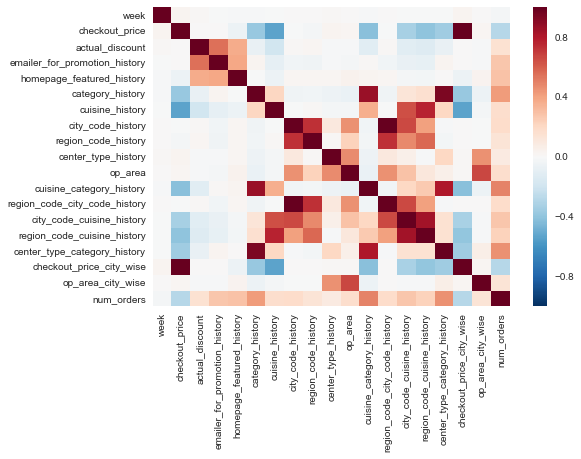

In [416]:
plt.show()

In [418]:
rfc=RandomForestRegressor()
rfc.fit(train[features],train[output])
predictions=rfc.predict(test[features])

In [298]:
import lightgbm as lgb

In [300]:
lt= lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=3, learning_rate=0.1, n_estimators=100,  subsample=0.9,  random_state=12, n_jobs=-1)

In [ ]:
lt.`

In [291]:
xgb=XGBRegressor(n_estimators=300,subsample=0.9,colsample_bytree=0.9,min_child_weight=40)

In [292]:
train.shape

(456548, 36)

In [301]:
lt.fit(train[features],train[output])
predictions=lt.predict(test[features])

In [362]:
mean_squared_log_error(test[output],predictions)#0.38693526971095088 base
#1 pred base rfc

0.36073580894933149

In [419]:
test['num_orders']=predictions

In [304]:
test[test['num_orders']<0]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,actual_discount,week_as_year,...,cuisine_history,city_code_history,region_code_history,center_type_history,cuisine_category_history,region_code_city_code_history,city_code_cuisine_history,region_code_cuisine_history,center_type_category_history,num_orders
531,1164653,146,149,1216,412.25,412.25,0,0,0.00,42,...,359.347830,126.972117,216.987835,262.394456,59.137142,126.972117,163.633676,290.038829,55.670259,-17.289382
532,1444590,146,149,2126,472.42,471.42,0,0,-1.00,42,...,359.347830,126.972117,216.987835,262.394456,59.137142,126.972117,163.633676,290.038829,55.670259,-17.289382
536,1177147,146,149,1247,445.23,447.23,0,0,2.00,42,...,229.039037,126.972117,216.987835,262.394456,30.651402,126.972117,124.689115,191.124048,28.041888,-11.615252
537,1455218,146,149,1770,425.83,486.03,0,0,60.20,42,...,229.039037,126.972117,216.987835,262.394456,30.651402,126.972117,124.689115,191.124048,28.041888,-5.050596
541,1045506,146,149,2444,726.53,727.53,0,0,1.00,42,...,164.545348,126.972117,216.987835,262.394456,100.895898,126.972117,90.210285,144.771886,101.888499,-3.996517
544,1008295,146,149,2492,456.93,456.93,0,0,0.00,42,...,229.039037,126.972117,216.987835,262.394456,66.250905,126.972117,124.689115,191.124048,60.079682,-8.734577
545,1406978,146,149,1543,466.57,467.57,0,0,1.00,42,...,229.039037,126.972117,216.987835,262.394456,66.250905,126.972117,124.689115,191.124048,60.079682,-8.734577
546,1470180,146,149,2304,482.09,482.09,0,0,0.00,42,...,229.039037,126.972117,216.987835,262.394456,66.250905,126.972117,124.689115,191.124048,60.079682,-8.734577
2354,1350206,146,41,1216,416.13,418.13,0,0,2.00,42,...,359.347830,362.566434,316.481849,206.670097,59.137142,362.566434,496.757230,443.725289,37.067478,-41.864291
2355,1276836,146,41,2126,484.03,485.03,0,0,1.00,42,...,359.347830,362.566434,316.481849,206.670097,59.137142,362.566434,496.757230,443.725289,37.067478,-41.864291


In [392]:
importance=pd.DataFrame()
importance['features']=features
importance['importances']=rfc.feature_importances_

In [393]:
importance.sort_values(by='importances')

,features,importances
8,cuisine_history,0.010197
7,category_history,0.011110
10,region_code_history,0.011846
11,center_type_history,0.012052
16,region_code_cuisine_history,0.013780
19,checkout_price_region_wise,0.020095
14,region_code_city_code_history,0.027948
6,week_as_year,0.028705
18,checkout_price_city_wise,0.029844
2,base_price,0.030007


In [420]:
test[['id','num_orders']].to_csv('predictions7.csv',index=False)

In [286]:
#mean_squared_log_error(test[output],predictions)#0.40 on validation 

In [ ]:
disputes_history['FIN_KUNNR_hist_group']=disputes_history['FIN_KUNNR_hist_group']
avg_dispute_amount_per_customer = disputes_history.groupby('FIN_KUNNR_hist_group').agg({'FIN_ORIGINAL_AMT':'mean'})
avg_dispute_amount_per_customer.reset_index(inplace=True)
avg_dispute_amount_per_customer.columns=['FIN_KUNNR_hist_group','avg_dispute_amount_per_customer']
avg_invalid_dispute_amount_per_customer = disputes_history[disputes_history['main_output'] == 0].groupby('FIN_KUNNR_hist_group').agg({'FIN_ORIGINAL_AMT':'mean'})
avg_invalid_dispute_amount_per_customer.reset_index(inplace=True)
avg_invalid_dispute_amount_per_customer.columns = ['FIN_KUNNR_hist_group','avg_invalid_dispute_amount']
intem = pd.merge(avg_invalid_dispute_amount_per_customer,avg_dispute_amount_per_customer,how='inner',on='FIN_KUNNR_hist_group')
intem['invalid_to_avg_per_customer_ratio'] = intem['avg_invalid_dispute_amount']/intem['avg_dispute_amount_per_customer']
intem['value_label'] = np.where(intem['invalid_to_avg_per_customer_ratio'] > 1,'HIGH','LOW')
train['FIN_KUNNR_hist_group']=train['FIN_KUNNR_hist_group'].astype(str)
train = pd.merge(train,intem,on='FIN_KUNNR_hist_group',how='left')
train['b_value'] = train['FIN_ORIGINAL_AMT']/train['avg_invalid_dispute_amount']
train.loc[train['value_label'] == 'LOW','b_value']=1/train.loc[train['value_label'] == 'LOW','b_value']
test['FIN_KUNNR_hist_group']=test['FIN_KUNNR_hist_group'].astype(str)
test = pd.merge(test,intem,on='FIN_KUNNR_hist_group',how='left')
test['b_value'] = test['FIN_ORIGINAL_AMT']/test['avg_invalid_dispute_amount']
test.loc[test['value_label'] == 'LOW','b_value']=1/test.loc[test['value_label'] == 'LOW','b_value']
train.loc[train['b_value']<=0.005,'b_value']=0.005
train.loc[train['b_value']>=5,'b_value']=5
test.loc[test['b_value']<=0.005,'b_value']=0.005
test.loc[test['b_value']>=5,'b_value']=5

In [ ]:
y_tr = df_tr['target'].values#target variable
skf = StratifiedKFold(y_tr,5,shuffle=True,random_state=123)

for tr_ind,val_ind in skf:
    X_tr,X_val = df_tr.iloc[tr_ind],df_tr.iloc[val_ind]
    for col in cols:#iterate through the columns we want to encode
        means = X_val[col].map(X_tr.groupby(col).target.mean())
    train_new.iloc[val_ind] = X_val
    
prior = df_tr['target'].mean() #global mean
train_new.fillna(prior,inplace=True)# fill nans with global means